#Qual seu tipo de dado (Aula 1)

In [ ]:
import pandas as pd

dados = pd.read_csv('dados.csv')

In [ ]:
dados.head()

,UF,Sexo,Idade,Cor,Anos de Estudo,Renda,Altura
0,11,0,23,8,12,800,1.603808
1,11,1,23,2,12,1150,1.739790
2,11,1,35,8,15,880,1.760444
3,11,0,46,2,6,3500,1.783158
4,11,1,47,8,9,150,1.690631


# Distribuição de frequências (Aula 2)

In [ ]:
dados['Sexo'].value_counts()

0    53250
1    23590
Name: Sexo, dtype: int64

In [ ]:
dados['Sexo'].value_counts(normalize = True) #interessante

0    0.692998
1    0.307002
Name: Sexo, dtype: float64

In [ ]:
frequencia = dados['Sexo'].value_counts()
percentual = dados['Sexo'].value_counts(normalize = True)*100

In [ ]:
dis_freq = pd.DataFrame({'Frequência' : frequencia, 'Porcentagem(%)': percentual})
dis_freq = dis_freq.rename(index = {0: 'Masculino', 1:'Feminino'})
dis_freq
#ou
#dis_freq.rename_axis('Sexo', axis = 'columns', inplace = True)

,Frequência,Porcentagem(%)
Masculino,53250,69.299844
Feminino,23590,30.700156


In [ ]:
#Outra forma , mas para várias categorias
sexo = {0: 'Masculino',
        1: 'Feminino'}
cor = {0:'Indígena',
       2:'Branca',
       4:'Preta',
       6:'Amarela',
       8:'Parda',
       9:'Sem declaração'}   
frequencia2 =pd.crosstab(dados.Sexo, dados.Cor)
frequencia2.rename(index= sexo, inplace = True)
frequencia2.rename(columns= cor, inplace = True)
frequencia2

Cor,Indígena,Branca,Preta,Amarela,Parda
Sexo,,,,,
Masculino,256,22194,5502,235,25063
Feminino,101,9621,2889,117,10862


In [ ]:
#fazendo com a porcentagem
sexo = {0: 'Masculino',
        1: 'Feminino'}
cor = {0:'Indígena',
       2:'Branca',
       4:'Preta',
       6:'Amarela',
       8:'Parda',
       9:'Sem declaração'}   
porcentual2 =pd.crosstab(dados.Sexo, dados.Cor,normalize = True)*100
porcentual2.rename(index= sexo, inplace = True)
porcentual2.rename(columns= cor, inplace = True)
porcentual2

Cor,Indígena,Branca,Preta,Amarela,Parda
Sexo,,,,,
Masculino,0.333160,28.883394,7.160333,0.305830,32.617126
Feminino,0.131442,12.520822,3.759761,0.152264,14.135867


In [ ]:
#já calcula a a média da renda por cor e sexo
sexo = {0: 'Masculino',
        1: 'Feminino'}
cor = {0:'Indígena',
       2:'Branca',
       4:'Preta',
       6:'Amarela',
       8:'Parda',
       9:'Sem declaração'}   
porcentual3 =pd.crosstab(dados.Sexo, dados.Cor,aggfunc='mean',values = dados.Renda)
porcentual3.rename(index= sexo, inplace = True)
porcentual3.rename(columns= cor, inplace = True)
porcentual3

Cor,Indígena,Branca,Preta,Amarela,Parda
Sexo,,,,,
Masculino,1081.710938,2925.744435,1603.861687,4758.251064,1659.577425
Feminino,2464.386139,2109.866750,1134.596400,3027.341880,1176.758516


Estratificando uma variavel continua 

In [ ]:
classes =[0,1576,3152,7880,15760,200000]
labels = ['E','D','C','B','A']
frequencia4 = pd.value_counts(
    pd.cut(x=dados.Renda,
           bins = classes,
           labels = labels,
           include_lowest = True))
frequencia4


E    49755
D    16700
C     7599
B     2178
A      608
Name: Renda, dtype: int64

In [ ]:
classes =[0,1576,3152,7880,15760,200000]
labels = ['E','D','C','B','A']
percentual4 = pd.value_counts(
    pd.cut(x=dados.Renda,
           bins = classes,
           labels = labels,
           include_lowest = True),
           normalize = True)
percentual4

E    0.647514
D    0.217335
C    0.098894
B    0.028345
A    0.007913
Name: Renda, dtype: float64

In [ ]:
dis_freq_corsexo = pd.DataFrame({'Frequência' : frequencia4, 'Porcentagem(%)': percentual4})
dis_freq_corsexo.sort_index(ascending = False)


,Frequência,Porcentagem(%)
A,608,0.007913
B,2178,0.028345
C,7599,0.098894
D,16700,0.217335
E,49755,0.647514


Estratificando variaveis quantitativas

In [ ]:
import numpy as np

In [ ]:
n=dados.shape[0]
k = 1 + (10/3)*np.log10(n)
k=k.round(0)
k

17.0

In [ ]:
freq_varquant = pd.value_counts(pd.cut(x = dados.Renda,
                       bins = 17,#não funciona colocando k. Precisa escrever o valor de k na mão
                       include_lowest = True), sort = False)

In [ ]:
perc_varquant = pd.value_counts(pd.cut(x = dados.Renda,
                       bins = 17,
                       include_lowest = True), sort = False,normalize = True)

In [ ]:
dis_freq_varquant = pd.DataFrame({'Frequência' : freq_varquant, 'Porcentagem(%)': perc_varquant})
dis_freq_varquant

In [ ]:
#criando o histograma
import seaborn as sns
ax = sns.distplot(dados.Altura, kde = False)

ax.figure.set_size_inches(12,6)
ax.set_title('Distribuição de Frequências - Altura', fontsize = 18)
ax.set_xlabel('Metros', fontsize = 14)
ax

In [ ]:
ax = sns.distplot(dados.Altura)#com kde
ax.figure.set_size_inches(14,6)
ax.set_title('Distribuição de Frequências', fontsize = 18)
ax.set_xlabel('Metros', fontsize = 14)
ax

In [ ]:
dados.Altura.hist(bins = 50, figsize=(12,6))

In [ ]:
dis_freq_corsexo['Frequência'].plot.bar(width = 1, color = 'blue',alpha =0.2,figsize = (12,6))

#Medidas de tendência central (Aula 3)

In [ ]:
dados.head()

In [ ]:
#média aritmética

#dados['Renda'].mean()
#dados.groupby(['Sexo']).mean()
dados.groupby(['Sexo'])['Renda'].mean()

In [ ]:
#mediana

#dados['Renda'].median()
#dados.groupby(['Sexo'])['Renda'].median()

#dados.Renda.quantile(0.25) #Q1
#dados.Renda.quantile() #Q2
dados.Renda.quantile(0.75) #Q3

In [ ]:
#moda
dados['Renda'].mode() # dados.Renda.mode()
dados.Altura.mode()

Relação entre média mediana e moda

In [ ]:
ax = sns.distplot(dados.query('Renda<20000').Renda)#essa query é importante
ax.figure.set_size_inches(12,6)
ax

In [ ]:
Moda = dados.Renda.mode()[0]
Moda

788

In [ ]:
Mediana = dados.Renda.median()
Mediana

1200.0

In [ ]:
Media = dados.Renda.mean()
Media

2000.3831988547631

In [ ]:
#testando as assimetrias
Moda < Mediana < Media # assimetrica a direita <)

True

# Medidas separatrizes (Aula 04)

In [ ]:
dados.Renda.quantile([0.25,0.5,0.75])

In [ ]:
#para encontrar o decil 
dados.Renda.quantile([i/10 for i in range(1,10)])#para encontrar o centil é só trocar 10 por 100

In [ ]:
ax=sns.distplot(dados.Idade, hist_kws = {'cumulative':True},
                              kde_kws = {'cumulative':True},
                              bins = 10)
ax.figure.set_size_inches(14,6)
ax.set_title('Distribuição de Frequências Acumulada', fontsize=18)
ax.set_ylabel('Acumulado', fontsize = 14)
ax.set_xlabel('Anos',fontsize = 14)
ax

Box-plot

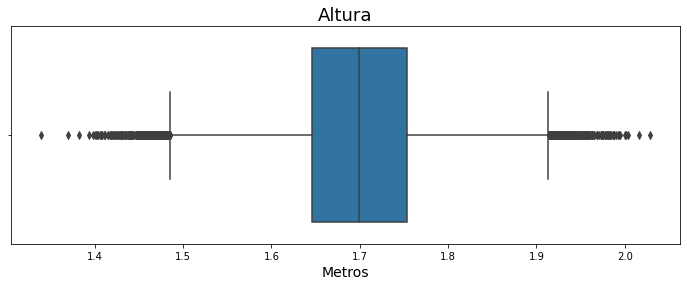

In [ ]:
ax=sns.boxplot(x= 'Altura',data=dados)
ax.figure.set_size_inches(12,4)
ax.set_title('Altura', fontsize=18)
ax.set_xlabel('Metros',fontsize = 14)
ax

In [ ]:
ax=sns.boxplot(x='Altura',y='Sexo',data=dados)
ax.figure.set_size_inches(12,4)
ax.set_title('Altura', fontsize=18)
ax.set_xlabel('Metros',fontsize =14)
ax

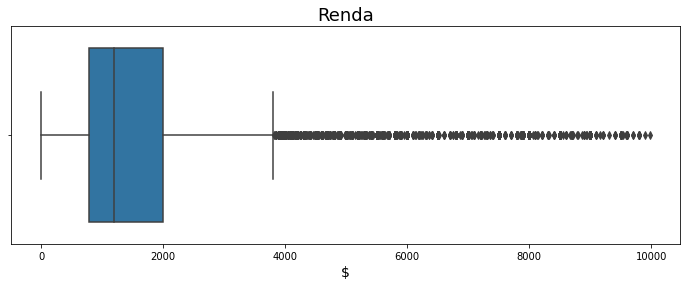

In [ ]:
ax=sns.boxplot(x= 'Renda',data=dados.query('Renda<10000'))
ax.figure.set_size_inches(12,4)
ax.set_title('Renda', fontsize=18)
ax.set_xlabel('$',fontsize = 14)
ax

In [ ]:
#Tá bugando (deve ser a versão do seaborn)
ax=sns.boxplot(x= 'Renda',y='Sexo',data=dados.query('Renda<10000'))
ax.figure.set_size_inches(12,4)
ax.set_title('Renda', fontsize=18)
ax.set_xlabel('$',fontsize = 14)
ax

In [ ]:
#esse aqui tá bugando
ax=sns.boxplot(x='Anos de Estudo',y='Sexo',data=dados)
ax.figure.set_size_inches(12,4)
ax.set_title('Renda', fontsize=18)
ax.set_xlabel('$',fontsize = 14)
ax

# Medidas de dispersão (Aula 05)

In [ ]:
# Desvio médio
desvio_medio = dados['Renda'].mad()
desvio_medio

1526.4951371644931

In [ ]:
# Variancia
variancia = dados['Renda'].var()
variancia

11044906.00622118

In [ ]:
# Desvio Padrão
desvio_padrao = dados['Renda'].std()
desvio_padrao

3323.3877303470294

# PROJETO FINAL (AULA 06)